In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tslearn import metrics
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics

In [2]:
df = pd.read_csv('synthetic_control.data')

,28.7812 34.4632 31.3381 31.2834 28.9207 33.7596 25.3969 27.7849 35.2479 27.1159 32.8717 29.2171 36.0253 32.337 34.5249 32.8717 34.1173 26.5235 27.6623 26.3693 25.7744 29.27 30.7326 29.5054 33.0292 25.04 28.9167 24.3437 26.1203 34.9424 25.0293 26.6311 35.6541 28.4353 29.1495 28.1584 26.1927 33.3182 30.9772 27.0443 35.5344 26.2353 28.9964 32.0036 31.0558 34.2553 28.0721 28.9402 35.4973 29.747 31.4333 24.5556 33.7431 25.0466 34.9318 34.9879 32.4721 33.3759 25.4652 25.8717
0,24.8923 25.741 27.5532 32.8217 27.8789 31.592...
1,31.3987 30.6316 26.3983 24.2905 27.8613 28.549...
2,25.774 30.5262 35.4209 25.6033 27.97 25.270...
3,27.1798 29.2498 33.6928 25.6264 24.6555 28.944...
4,25.5067 29.7929 28.0765 34.4812 33.8 27.667...


In [3]:
ts = []
y=[]
def word_gen(file):
    for i, line in enumerate(file):
        y1=[]
        for word in line.split():
            y1.append(float(word))
        y.append(y1)
    return 

with open('synthetic_control.data') as f:
    ts = word_gen(f)

In [4]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) # Rescale time series
y_scaled = scaler.fit_transform(y)

path, sim = metrics.dtw_path(y_scaled[0], y_scaled[1])

LB_Keogh

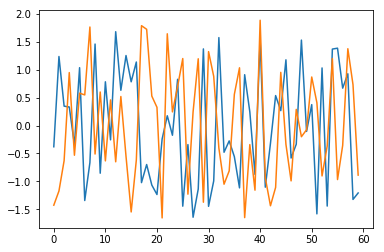

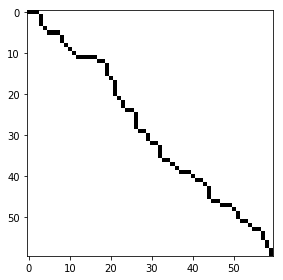

In [5]:
matrix_path = numpy.zeros((60, 60), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1
plt.figure()
plt.plot(numpy.arange(60), y_scaled[0, :, 0])
plt.plot(numpy.arange(60), y_scaled[1, :, 0])
plt.show()
plt.imshow(matrix_path, cmap="gray_r")
plt.tight_layout()
plt.show()

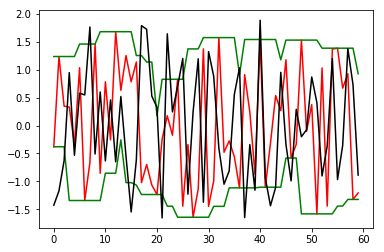

LB_Keogh similarity:  2.11582221120403


In [6]:
sz=60
dataset = y
dataset_scaled = y_scaled
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)
plt.figure()
envelope_down, envelope_up = metrics.lb_envelope(dataset_scaled[0], radius=3)
plt.plot(numpy.arange(sz), dataset_scaled[0, :, 0], "r-")
plt.plot(numpy.arange(sz), envelope_down[:, 0], "g-")
plt.plot(numpy.arange(sz), envelope_up[:, 0], "g-")
plt.plot(numpy.arange(sz), dataset_scaled[1, :, 0], "k-")
plt.show()
print("LB_Keogh similarity: ", metrics.lb_keogh(dataset_scaled[1],envelope_candidate=(envelope_down, envelope_up)))

Piecewise aggregate approximation

In [13]:
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

In [14]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))

In [22]:
# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))

In [23]:
# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 8
one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols_avg, alphabet_size_slope=n_sax_symbols_slope)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(one_d_sax.fit_transform(dataset))

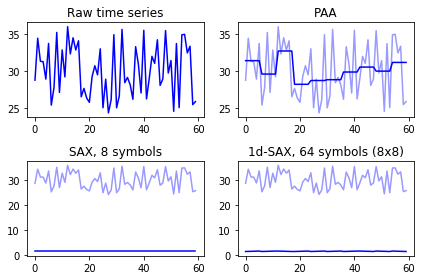

In [27]:
dataset = np.asarray(dataset)
sax = SymbolicAggregateApproximation(n_segments=20, alphabet_size_avg=5)
sax_data = sax.fit_transform(dataset)

plt.figure()
plt.subplot(2, 2, 1) # First, raw time series
plt.plot(dataset[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2) # Second, PAA
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3) # Then SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4) # Finally, 1d-SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols (%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope, n_sax_symbols_avg,n_sax_symbols_slope))

plt.tight_layout()
plt.show()